In [27]:
%matplotlib inline
from sklearn import linear_model
import statsmodels.formula.api as smf
from IPython.display import display
import numpy as np
import pandas as pd
import scipy
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import time
from sklearn.ensemble import RandomForestClassifier

import io
import graphviz
import pydotplus
from scipy import misc
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
train, test = train_test_split(df, test_size=.2)

In [30]:
print('Training size: {}; Test size: {}'.format(len(train), len(test)))

Training size: 120; Test size: 30


In [31]:
sns.set_style("white")

In [32]:
Setosa_Sep_Len = df[df['Species'] == "Iris-setosa"]["SepalLengthCm"]
Versi_Sep_Len = df[df['Species'] == "Iris-versicolor"]["SepalLengthCm"]
Virgin_Sep_Len = df[df['Species'] == "Iris-virginica"]["SepalLengthCm"]

Setosa_Sep_Wid = df[df['Species'] == "Iris-setosa"]["SepalWidthCm"]
Versi_Sep_Wid = df[df['Species'] == "Iris-versicolor"]["SepalWidthCm"]
Virgin_Sep_Wid = df[df['Species'] == "Iris-virginica"]["SepalWidthCm"]

Setosa_Pet_Len = df[df['Species'] == "Iris-setosa"]["PetalLengthCm"]
Versi_Pet_Len = df[df['Species'] == "Iris-versicolor"]["PetalLengthCm"]
Virgin_Pet_Len = df[df['Species'] == "Iris-virginica"]["PetalLengthCm"]

Setosa_Pet_Wid = df[df['Species'] == "Iris-setosa"]["PetalWidthCm"]
Versi_Pet_Wid = df[df['Species'] == "Iris-versicolor"]["PetalWidthCm"]
Virgin_Pet_Wid = df[df['Species'] == "Iris-virginica"]["PetalWidthCm"]

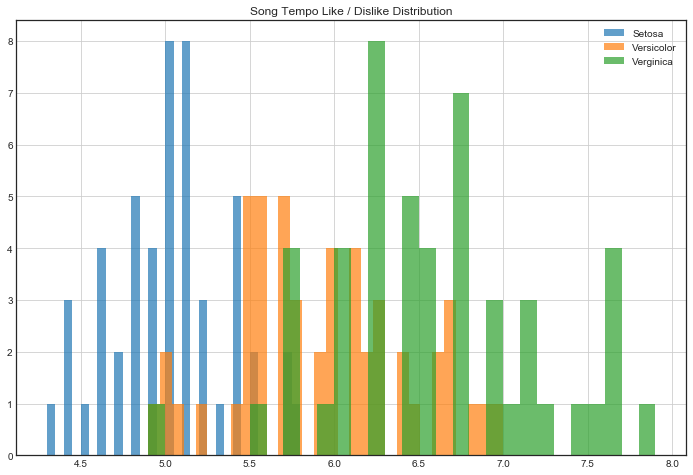

In [33]:
fig = plt.figure(figsize=(12, 8))
plt.title("Song Tempo Like / Dislike Distribution")
Setosa_Sep_Len.hist(alpha = 0.7, bins=30, label='Setosa')
Versi_Sep_Len.hist(alpha = 0.7, bins=30, label='Versicolor')
Virgin_Sep_Len.hist(alpha = 0.7, bins=30, label='Verginica')
plt.legend(loc= "upper right")

C:\Users\MESUPERSEXAYYY\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


--- 0.0 seconds ---


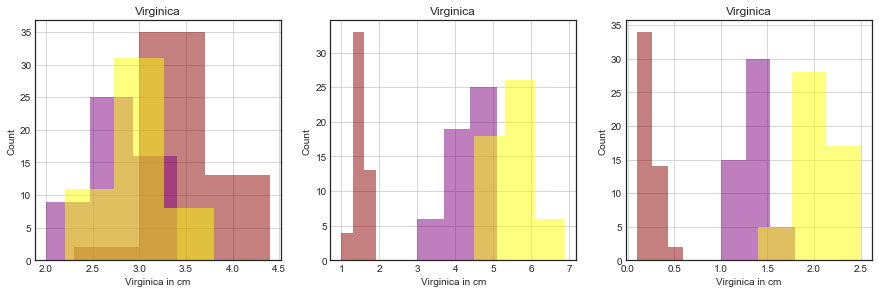

In [51]:
fig1 = plt.figure(figsize = (15,15))

## Iris-Virginica
ax1 = fig1.add_subplot(331)
ax1.set_xlabel('Virginica in cm')
ax1.set_ylabel('Count')
ax1.set_title('Virginica')
Setosa_Sep_Wid.hist(alpha=0.5, bins= 3, color='darkred')
ax2 = fig1.add_subplot(331)
Versi_Sep_Wid.hist(alpha=0.5, bins= 3, color='purple')
ax3 = fig1.add_subplot(331)
Virgin_Sep_Wid.hist(alpha=0.5, bins= 3, color='yellow')

ax4 = fig1.add_subplot(332)
ax4.set_xlabel('Virginica in cm')
ax4.set_ylabel('Count')
ax4.set_title('Virginica')
Setosa_Pet_Len.hist(alpha=0.5, bins= 3, color='darkred')
ax5 = fig1.add_subplot(332)
Versi_Pet_Len.hist(alpha=0.5, bins= 3, color='purple')
ax6 = fig1.add_subplot(332)
Virgin_Pet_Len.hist(alpha=0.5, bins= 3, color='yellow')

ax7 = fig1.add_subplot(333)
ax7.set_xlabel('Virginica in cm')
ax7.set_ylabel('Count')
ax7.set_title('Virginica')
Setosa_Pet_Wid.hist(alpha=0.5, bins= 3, color='darkred')
ax8 = fig1.add_subplot(333)
Versi_Pet_Wid.hist(alpha=0.5, bins= 3, color='purple')
ax9 = fig1.add_subplot(333)
Virgin_Pet_Wid.hist(alpha=0.5, bins= 3, color='yellow')

start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

In [35]:
c = DecisionTreeClassifier(min_samples_split=20)

In [36]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [37]:
X_train = train[features]
y_train = train['Species']

X_test = test[features]
y_test = train['Species']

In [38]:
dt = c.fit(X_train, y_train)

In [39]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"] = (20, 20)
    plt.imshow(img)

C:\Users\MESUPERSEXAYYY\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


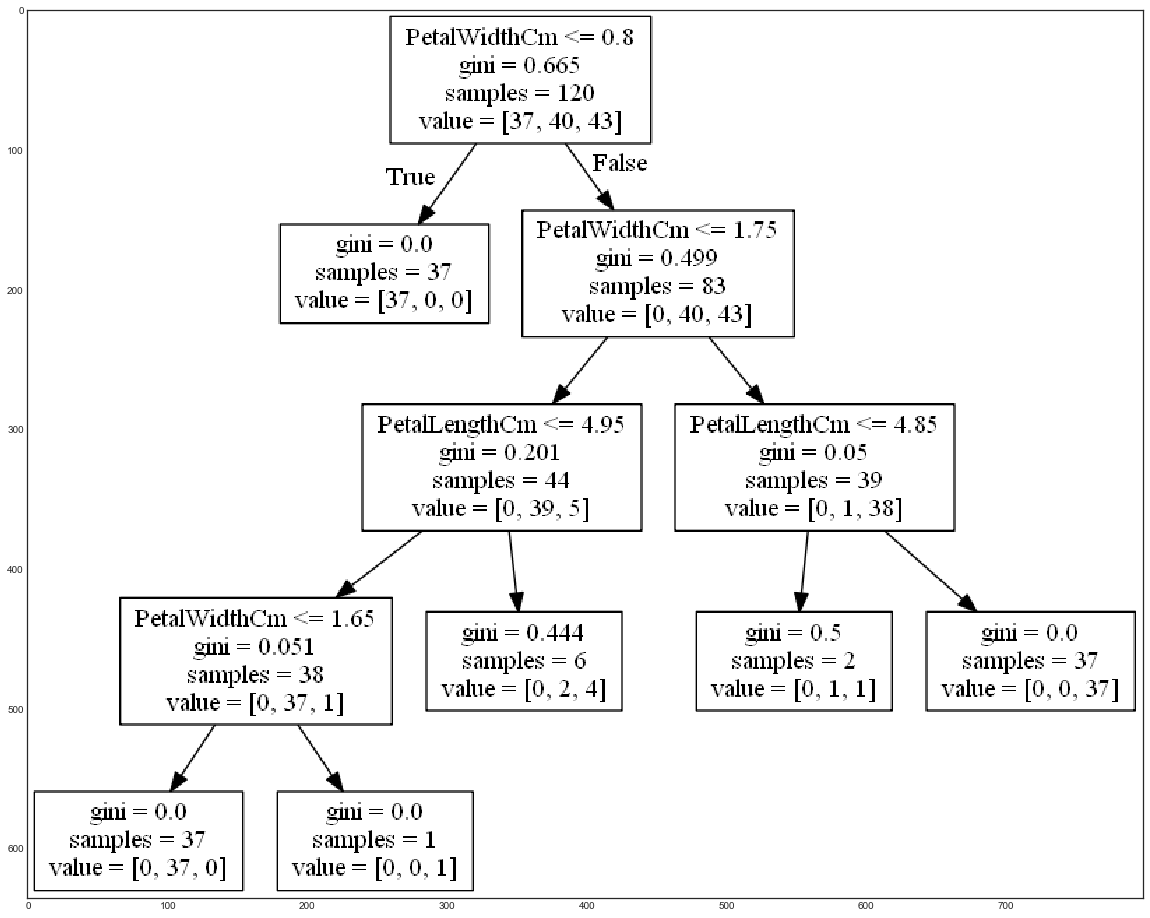

In [40]:
show_tree(dt, features, 'decision_trees.png')

In [41]:
y_pred = c.predict(X_test)

In [42]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa'], dtype=object)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
### score = accuracy_score(y_test, y_pred) * 100
### Did not work...why?

## print("Accuracy using Decision Tree: ", round(score, 1), "%")

In [45]:
pd.crosstab(test['Species'], y_pred, rownames=['Actual Species'], colnames=["Predicted Species"])

Predicted Species,Iris-setosa,Iris-versicolor,Iris-virginica
Actual Species,,,
Iris-setosa,13,0,0
Iris-versicolor,0,10,0
Iris-virginica,0,1,6


In [49]:
29/30

0.9666666666666667

Our prediction have a success rate of 97% to predict the right Iris flower. 
Only prediction wrong is Versicolor Iris, it was suppose to be Virginica Iris.
But overall, the percentage is very good!

Decision Tree itself is not very accurate and very limited on what it can run and easy to be Overfit.
But with Random Forest, it become more flexible and help reduce Overfitting and make it work very well with all data.

And since this is a small dataset, the run time is 0 seconds.